In [9]:
from econometron.Models.varima import VARIMA
import pandas as pd

In [10]:
import scipy.io as sio
mat = sio.loadmat('../Z.mat')
y=mat['Z']

In [11]:
data=pd.DataFrame(y.T)

In [12]:
# Create a date range with quarterly frequency for 117 periods
dates = pd.date_range(start='2000-01-01', periods=117, freq='Q')

# Assign the date range as the index of the dataframe
data.index = dates

In [13]:
data

,0,1,2
2000-03-31,0.026524,0.015403,0.043721
2000-06-30,0.016615,0.012219,0.021177
2000-09-30,0.018282,0.007285,-0.005417
2000-12-31,0.019048,0.005601,-0.010110
2001-03-31,0.010364,0.002916,-0.024202
...,...,...,...
2028-03-31,-0.009592,-0.008468,-0.025211
2028-06-30,-0.009626,-0.000652,-0.013926
2028-09-30,-0.009535,0.001414,-0.005745
2028-12-31,-0.009318,0.000230,-0.002464


In [14]:
varima_model = VARIMA(max_p=2,max_q=2,criterion='AIC', forecast_horizon=5, plot=True)

Processing time series for stationarity...

Processing column: 0
0 is not stationary (p-value: 0.1926)
0 becomes stationary after 1 differencing (p-value: 0.0000)


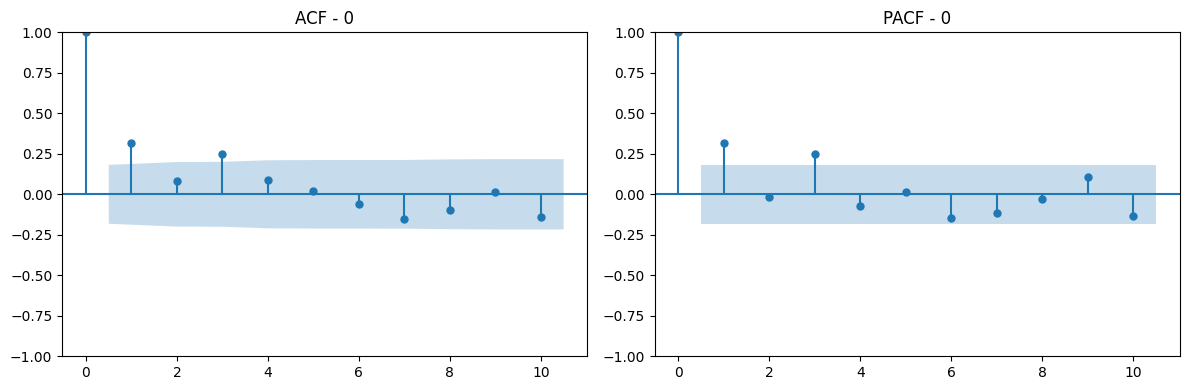


Processing column: 1
1 is stationary (p-value: 0.0328)


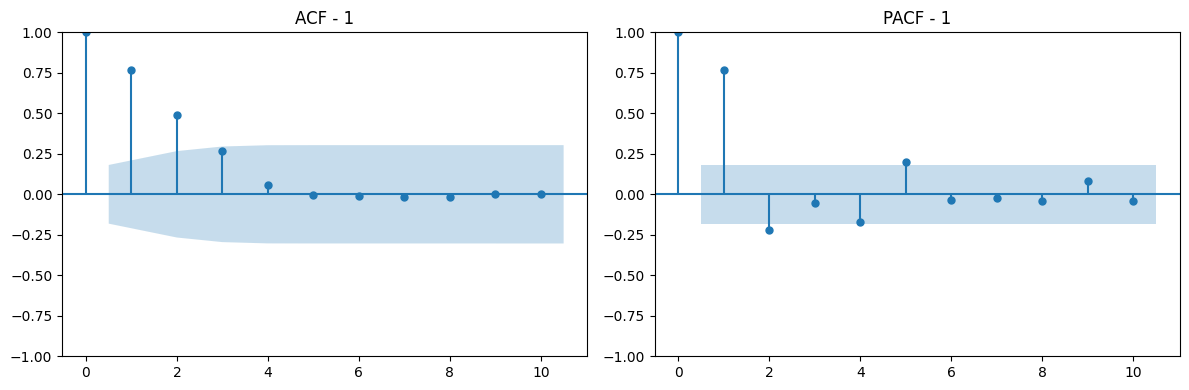


Processing column: 2
2 is stationary (p-value: 0.0018)


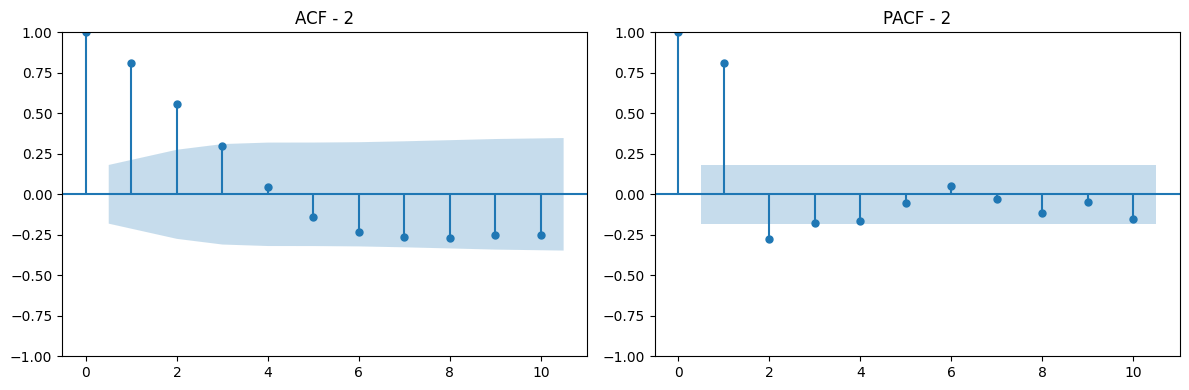

Fitting VARIMA model with 116 observations and 3 variables...
Trying VARIMA(0, d, 1)...


c:\users\asus\econometron\econometron\Models\varima.py:288: RuntimeWarning: divide by zero encountered in log
  log_det = np.log(np.linalg.det(resid_cov))
c:\users\asus\econometron\econometron\Models\varima.py:288: RuntimeWarning: invalid value encountered in log
  log_det = np.log(np.linalg.det(resid_cov))


  AIC: -929.5529
Trying VARIMA(0, d, 2)...
  AIC: -903.7150
Trying VARIMA(1, d, 0)...
  AIC: -929.9993
Trying VARIMA(1, d, 1)...
  AIC: -912.1045
Trying VARIMA(1, d, 2)...
  AIC: -885.8338
Trying VARIMA(2, d, 0)...
  AIC: -903.7829
Trying VARIMA(2, d, 1)...
  AIC: -885.8734
Trying VARIMA(2, d, 2)...
  Optimization failed: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT


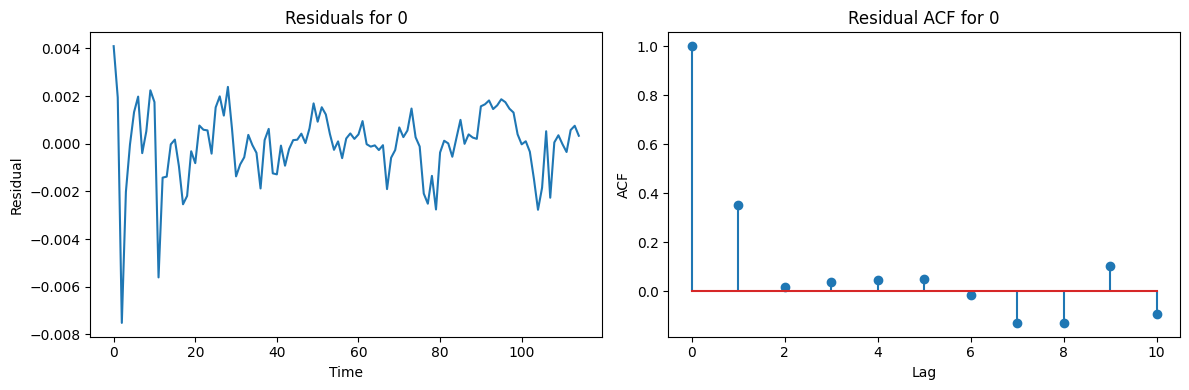

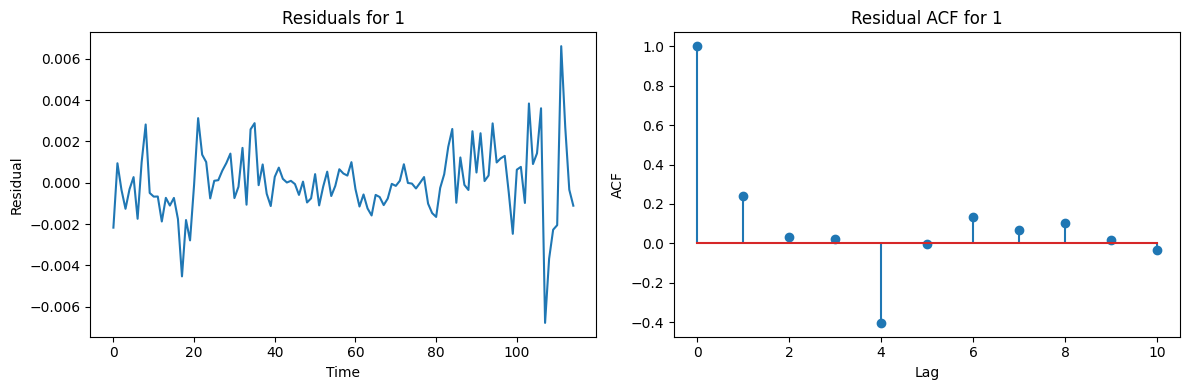

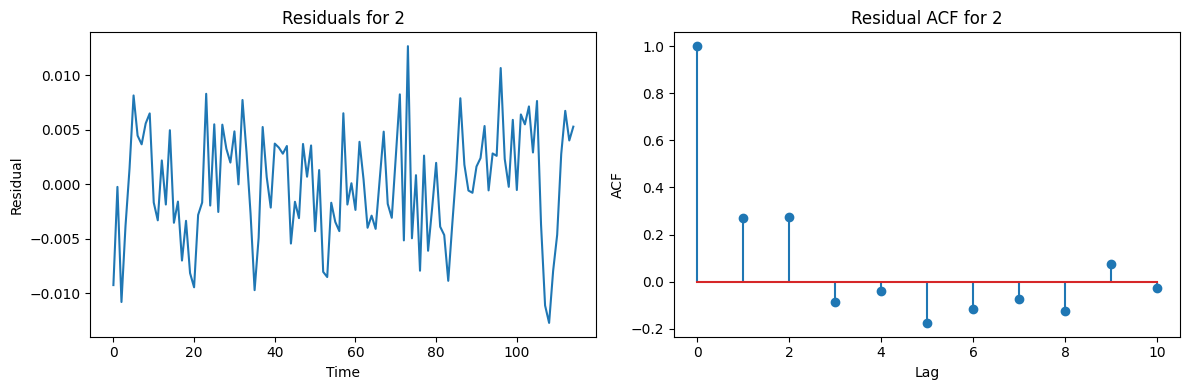

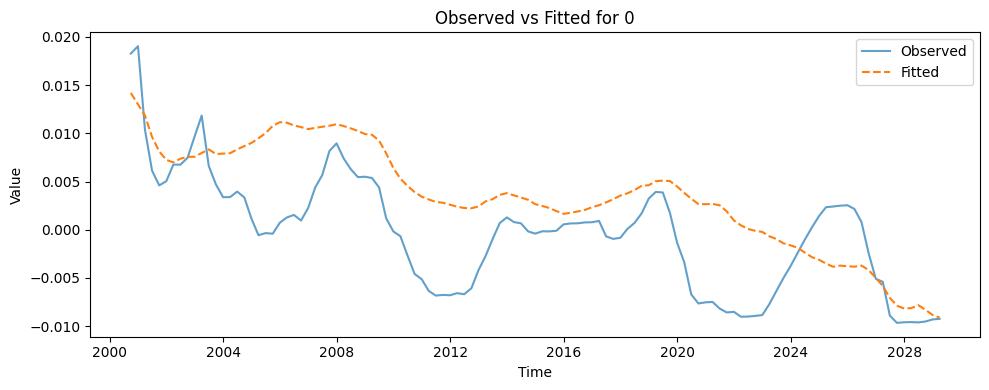

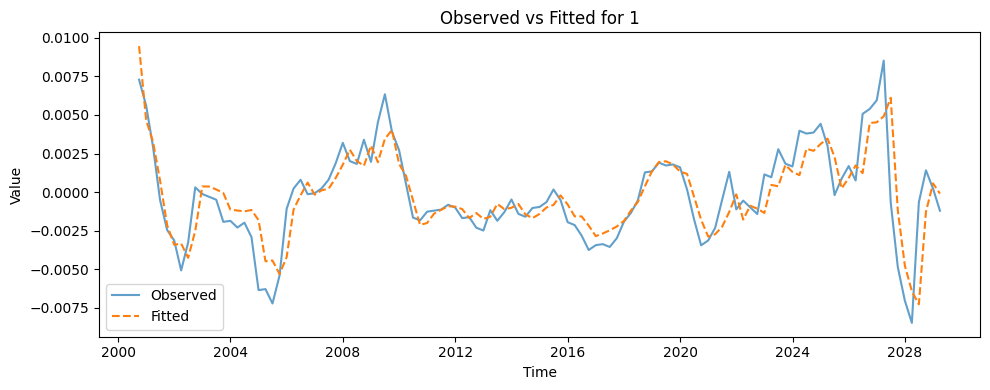

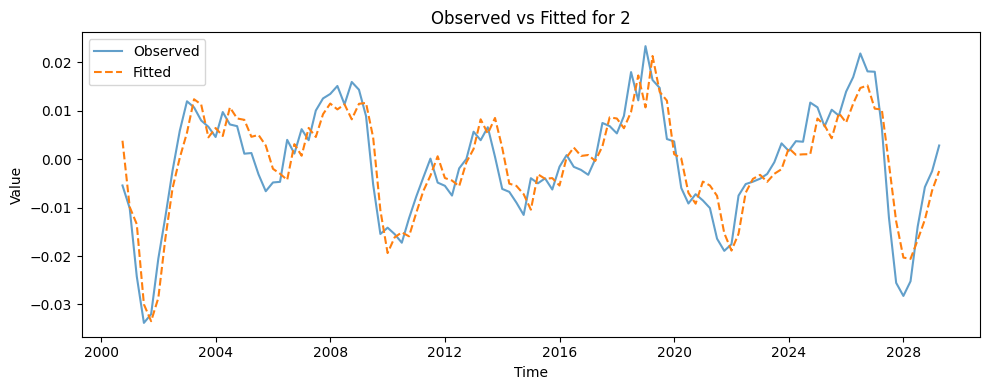


Best VARIMA Model:
AR Lags: 1, MA Lags: 0
AIC: -929.9993
0 differencing order: 1
1 differencing order: 0
2 differencing order: 0

Coefficient Table:
            0_coef    0_se     0_z     0_p  1_coef     1_se     1_z     1_p  \
Constant   -0.0002  0.7613 -0.0003  1.9996 -0.0001   0.2176 -0.0006  1.9990   
AR_Lag_1_0  0.1104  4.6904  0.0235  1.9624 -0.0048   2.3882 -0.0020  1.9968   
AR_Lag_1_1 -0.1401  2.7965 -0.0501  1.9201  0.6951  24.0171  0.0289  1.9538   
AR_Lag_1_2  0.0270  4.4760  0.0060  1.9904  0.0494  20.9053  0.0024  1.9962   

            2_coef     2_se     2_z     2_p  
Constant   -0.0001   0.5031 -0.0002  1.9997  
AR_Lag_1_0  0.6014  27.2208  0.0221  1.9647  
AR_Lag_1_1 -0.7904  40.7333 -0.0194  1.9690  
AR_Lag_1_2  0.9233  28.2627  0.0327  1.9479  

Residual Diagnostics:
0:
  Mean = -0.0000, Variance = 0.0000
  Ljung-Box Test: Statistic = 22.0482, p-value = 0.0149
  Shapiro-Wilk Test: Statistic = 0.8908, p-value = 0.0000
1:
  Mean = 0.0000, Variance = 0.0000
  Ljung-Bo

In [15]:
varima_model.fit(data, date_column='', columns=[0, 1 ,2])